# cbow模型(Continuous Bag-Of-Words Model)预测

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch03/cbow_predict.py

In [2]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul


# 示例上下文数据
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 权重初始化
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 生成层
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 前向传播
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[ 0.28830492  0.58316349 -0.29270063 -0.05973828  0.6979968  -0.3119117
   0.39784004]]


# simple cbow模型实现

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch03/simple_cbow.py

In [3]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 权重初始化
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 生成层
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 将所有的权重和梯度汇总到列表
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 设置单词的离散表示成员变量
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

# 训练上述模型

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch03/train.py

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 251 |  iter 1 / 2 | time 0[s] | loss 1.11
| epoch 252 |  iter 1 / 2 | time 0[s] | loss 1.10
| epoch 253 |  iter 1 / 2 | time 0[s] | loss 1.17
| epoch 254 |  iter 1 / 2 | time 0[s] | loss 0.95
| epoch 255 |  iter 1 / 2 | time 0[s] | loss 1.24
| epoch 256 |  iter 1 / 2 | time 0[s] | loss 0.95
| epoch 257 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 258 |  iter 1 / 2 | time 0[s] | loss 1.17
| epoch 259 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 260 |  iter 1 / 2 | time 0[s] | loss 1.16
| epoch 261 |  iter 1 / 2 | time 0[s] | loss 1.00
| epoch 262 |  iter 1 / 2 | time 0[s] | loss 1.09
| epoch 263 |  iter 1 / 2 | time 0[s] | loss 1.01
| epoch 264 |  iter 1 / 2 | time 0[s] | loss 1.15
| epoch 265 |  iter 1 / 2 | time 0[s] | loss 1.15
| epoch 266 |  iter 1 / 2 | time 0[s] | loss 1.00
| epoch 267 |  iter 1 / 2 | time 0[s] | loss 1.07
| epoch 268 |  iter 1 / 2 | time 0[s] | loss 1.07
| epoch 269 |  iter 1 / 2 | time 0[s] | loss 1.07
| epoch 270 |  iter 1 / 2 | time 0[s] | loss 1.06


| epoch 525 |  iter 1 / 2 | time 0[s] | loss 0.75
| epoch 526 |  iter 1 / 2 | time 0[s] | loss 0.61
| epoch 527 |  iter 1 / 2 | time 0[s] | loss 0.83
| epoch 528 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 529 |  iter 1 / 2 | time 0[s] | loss 0.88
| epoch 530 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 531 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 532 |  iter 1 / 2 | time 0[s] | loss 0.70
| epoch 533 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 534 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 535 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 536 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 537 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 538 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 539 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 540 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 541 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 542 |  iter 1 / 2 | time 0[s] | loss 0.74
| epoch 543 |  iter 1 / 2 | time 0[s] | loss 0.82
| epoch 544 |  iter 1 / 2 | time 0[s] | loss 0.65


| epoch 813 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 814 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 815 |  iter 1 / 2 | time 0[s] | loss 0.45
| epoch 816 |  iter 1 / 2 | time 0[s] | loss 0.65
| epoch 817 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 818 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 819 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 820 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 821 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 822 |  iter 1 / 2 | time 0[s] | loss 0.48
| epoch 823 |  iter 1 / 2 | time 0[s] | loss 0.76
| epoch 824 |  iter 1 / 2 | time 0[s] | loss 0.48
| epoch 825 |  iter 1 / 2 | time 0[s] | loss 0.58
| epoch 826 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 827 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 828 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 829 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 830 |  iter 1 / 2 | time 0[s] | loss 0.72
| epoch 831 |  iter 1 / 2 | time 0[s] | loss 0.58
| epoch 832 |  iter 1 / 2 | time 0[s] | loss 0.58


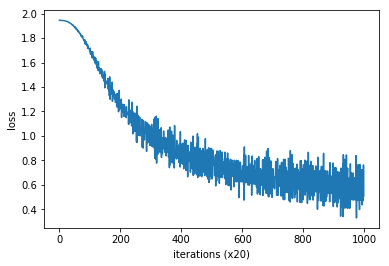

you [ 1.1038777 -1.196002  -1.1143904 -1.3022822  1.1595826]
say [-1.1599057   1.1478875   1.1967069   1.2020487  -0.29122028]
goodbye [ 0.8487068  -0.7056579  -0.7870041  -0.546611    0.86524045]
and [-0.9744709   0.93352073  0.8972963   1.0189264  -1.8906462 ]
i [ 0.82690436 -0.70449865 -0.8036619  -0.5569182   0.87981224]
hello [ 1.1011314 -1.2042462 -1.1150492 -1.2865607  1.181219 ]
. [-1.0573411  1.0914458  1.1305699  1.0490285  1.830045 ]


In [6]:
# coding: utf-8
import sys
sys.path.append('..')  # 为导入父目录中的文件而进行的设置
from common.trainer import Trainer
from common.optimizer import Adam
#from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

# simple skip gram实现

https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch03/simple_skip_gram.py

In [7]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        #  权重初始化
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 生成层
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 将所有的权重和梯度汇总到列表
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 设置单词的离散表示成员变量
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

# 训练上述模型

原作者未提供SimpleSkipGram的训练代码，这里参考前面的训练代码，编写了训练代码

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 3.89
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 3.88
| epoch 21 |  iter 1 / 2 | ti

| epoch 223 |  iter 1 / 2 | time 0[s] | loss 2.76
| epoch 224 |  iter 1 / 2 | time 0[s] | loss 2.54
| epoch 225 |  iter 1 / 2 | time 0[s] | loss 2.67
| epoch 226 |  iter 1 / 2 | time 0[s] | loss 2.54
| epoch 227 |  iter 1 / 2 | time 0[s] | loss 2.66
| epoch 228 |  iter 1 / 2 | time 0[s] | loss 2.59
| epoch 229 |  iter 1 / 2 | time 0[s] | loss 2.59
| epoch 230 |  iter 1 / 2 | time 0[s] | loss 2.72
| epoch 231 |  iter 1 / 2 | time 0[s] | loss 2.29
| epoch 232 |  iter 1 / 2 | time 0[s] | loss 2.71
| epoch 233 |  iter 1 / 2 | time 0[s] | loss 2.64
| epoch 234 |  iter 1 / 2 | time 0[s] | loss 2.49
| epoch 235 |  iter 1 / 2 | time 0[s] | loss 2.62
| epoch 236 |  iter 1 / 2 | time 0[s] | loss 2.49
| epoch 237 |  iter 1 / 2 | time 0[s] | loss 2.39
| epoch 238 |  iter 1 / 2 | time 0[s] | loss 2.76
| epoch 239 |  iter 1 / 2 | time 0[s] | loss 2.47
| epoch 240 |  iter 1 / 2 | time 0[s] | loss 2.45
| epoch 241 |  iter 1 / 2 | time 0[s] | loss 2.61
| epoch 242 |  iter 1 / 2 | time 0[s] | loss 2.52


| epoch 499 |  iter 1 / 2 | time 0[s] | loss 2.06
| epoch 500 |  iter 1 / 2 | time 0[s] | loss 1.98
| epoch 501 |  iter 1 / 2 | time 0[s] | loss 1.78
| epoch 502 |  iter 1 / 2 | time 0[s] | loss 2.01
| epoch 503 |  iter 1 / 2 | time 0[s] | loss 2.22
| epoch 504 |  iter 1 / 2 | time 0[s] | loss 2.20
| epoch 505 |  iter 1 / 2 | time 0[s] | loss 1.81
| epoch 506 |  iter 1 / 2 | time 0[s] | loss 2.00
| epoch 507 |  iter 1 / 2 | time 0[s] | loss 2.00
| epoch 508 |  iter 1 / 2 | time 0[s] | loss 2.00
| epoch 509 |  iter 1 / 2 | time 0[s] | loss 2.02
| epoch 510 |  iter 1 / 2 | time 0[s] | loss 2.00
| epoch 511 |  iter 1 / 2 | time 0[s] | loss 1.97
| epoch 512 |  iter 1 / 2 | time 0[s] | loss 1.78
| epoch 513 |  iter 1 / 2 | time 0[s] | loss 2.21
| epoch 514 |  iter 1 / 2 | time 0[s] | loss 2.22
| epoch 515 |  iter 1 / 2 | time 0[s] | loss 1.97
| epoch 516 |  iter 1 / 2 | time 0[s] | loss 1.58
| epoch 517 |  iter 1 / 2 | time 0[s] | loss 2.41
| epoch 518 |  iter 1 / 2 | time 0[s] | loss 1.77


| epoch 779 |  iter 1 / 2 | time 0[s] | loss 2.11
| epoch 780 |  iter 1 / 2 | time 0[s] | loss 1.69
| epoch 781 |  iter 1 / 2 | time 0[s] | loss 2.36
| epoch 782 |  iter 1 / 2 | time 0[s] | loss 1.46
| epoch 783 |  iter 1 / 2 | time 0[s] | loss 2.34
| epoch 784 |  iter 1 / 2 | time 0[s] | loss 1.69
| epoch 785 |  iter 1 / 2 | time 0[s] | loss 1.89
| epoch 786 |  iter 1 / 2 | time 0[s] | loss 1.91
| epoch 787 |  iter 1 / 2 | time 0[s] | loss 1.90
| epoch 788 |  iter 1 / 2 | time 0[s] | loss 1.90
| epoch 789 |  iter 1 / 2 | time 0[s] | loss 1.90
| epoch 790 |  iter 1 / 2 | time 0[s] | loss 1.90
| epoch 791 |  iter 1 / 2 | time 0[s] | loss 1.89
| epoch 792 |  iter 1 / 2 | time 0[s] | loss 1.90
| epoch 793 |  iter 1 / 2 | time 0[s] | loss 2.13
| epoch 794 |  iter 1 / 2 | time 0[s] | loss 1.46
| epoch 795 |  iter 1 / 2 | time 0[s] | loss 2.11
| epoch 796 |  iter 1 / 2 | time 0[s] | loss 1.91
| epoch 797 |  iter 1 / 2 | time 0[s] | loss 1.90
| epoch 798 |  iter 1 / 2 | time 0[s] | loss 1.90


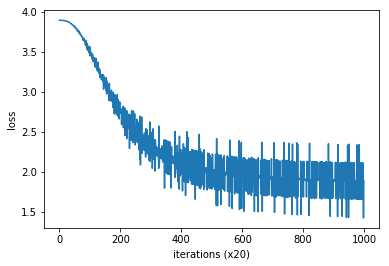

you [ 0.00496249 -0.01331236 -0.01012976  0.00186353  0.00807451]
say [ 0.16092646 -0.9065952  -0.9175136  -1.1712198   0.90137994]
goodbye [ 1.0665348  0.8425567  0.8377366  0.9170987 -0.8304145]
and [ 1.011805  -1.0424854 -1.0371493  1.3966451  1.0428121]
i [ 1.0596083   0.84365463  0.82681113  0.922173   -0.8266081 ]
hello [-1.2127174   0.99186623  0.9595063  -0.15925652 -0.96904427]
. [ 0.01636839  0.00071803  0.00527886 -0.00629089 -0.00618663]


In [8]:
# coding: utf-8
import sys
sys.path.append('..')  # 为导入父目录中的文件而进行的设置
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])